In [ ]:
## Preparação do ambiente
# Carregando as bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, odeint
from scipy.interpolate import interp1d
import os as os
DATA_FOLDER = os.path.join(os.getcwd(),'iba_activities')

!git clone https://github.com/tiagofiorini/iba_activities.git

# Atividade 1-A: Fator cinemático e transferência de energia

## Introdução

O fator cinemático $K$ informa a fração da energia inicial do íon que é retida com ele após uma colisão com um átomo do material alvo, em que o íon incidente sai com um ângulo $\theta$ em relação com sua direção inicial.

$K= \left( \frac{A_1}{A_1+A_2}  \right)^2 \left[ \cos \theta + \sqrt{ \frac{A_2^2}{A_1^2} - \sin^2 \theta } \right]^2 $

Já o fator cinemático de recuo, $R$, informa a energia que é transferida ao átomo do material alvo, quando este último sai com velocidade em ângulo $\phi$ em relação a direção inicial do íon incidente.

$R = 4 \frac{ A_1 A_2} {(A_2+A_1)^2} \cos^2 \phi$

In [ ]:
# Definição da função que calcula o fator cinemático, K
def K( A1, A2 ):
  if A1 < A2:
    theta = np.linspace(0,np.pi,1000)
  else:
    theta = np.linspace(0,np.arcsin(A2/A1),500)
  Kin  = ( A1 / (A1 + A2) )**2 * (np.cos(theta) + np.sqrt((A2/A1)**2 - np.sin(theta)**2) )**2
  if A1 > A2:
    Kp = ( A1 / (A1 + A2) )**2 * (np.cos(theta) - np.sqrt((A2/A1)**2 - np.sin(theta)**2) )**2
    Kin = np.asarray([Kin, Kp]).T
  return theta, Kin

# Definição da função que calcula o fator cinemático de recuo, R
def R( A1, A2 ):
  phi = np.linspace(0,np.pi,1000)
  Rec = ( 4*A1*A2 / (A1 + A2)**2 ) * np.cos(phi)**2
  Rec[np.logical_and(phi>np.pi/2,phi<3*np.pi/2)] = 0.0
  return phi, Rec

## Dependência da energia com o ângulo de espalhamento


In [ ]:
A1 = 4
A2 = 28

thetaK, Kinematic = K(A1,A2)
thetaR, Recoil    = R(A1,A2)
plt.plot(np.degrees(thetaK),Kinematic)
plt.plot(np.degrees(thetaR),Recoil)
plt.xlim(xmin=0,xmax=180)
plt.ylim(ymin=0,ymax=1.0)
plt.xlabel('Ângulo de espalhamento',fontsize=14)
plt.ylabel('R/K',fontsize=14);

## Gráfico polar dos fatores cinemáticos

In [ ]:
theta = np.linspace(0,2*np.pi,100)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetaK, Kinematic,'b')
ax.plot(-1*thetaK, Kinematic,'b')
ax.plot(thetaR, Recoil,'r')
ax.plot(-1*thetaR, Recoil,'r');


## Fração média de energia transferia por colisão íon-núcleo

Uma estimativa para a fração média de energia transferida por colisão entre o íon e um núcleo de átomo do material alvo pode ser calculado a partir do fator cinemático de recuo:

$<R> = 4 \frac{ A_1 A_2} {(A_2+A_1)^2} < \cos^2 \phi > = 2 \frac{ A_1 A_2} {(A_2+A_1)^2} $

A energia transferida é máxima para $A_1 \approx A_2$.

In [ ]:
a1 = 4
a2 = 28

a_s = np.arange(1,93,1)

plt.subplot(121)
plt.plot(a_s, 2*a1 * a_s/((a1+a_s)**2) )
plt.xlabel('A2',fontsize=14)
plt.ylabel('<R>',fontsize=14)
plt.ylim(ymin=0.0,ymax=1.0)
plt.xlim(xmin=0.0)
plt.subplot(122)
plt.plot(a_s, 2*a_s * a2/((a_s+a2)**2) )
plt.xlabel('A1')
plt.ylim(ymin=0.0,ymax=1.0)
plt.xlim(xmin=0.0);

A energia mínima necessária para produzir o deslocamento de um átomo de silício, promovendo o seu desligamento da rede cristalina em silício puro é de 15 eV. Qual a energia mínima que um próton deve ter para produzir esse deslocamento? E uma partícula alfa?

In [ ]:
R_Si = 2*a1*28.0/((a1+28.0)**2)

# O que vem aqui?
Emin = 
print('A energia mínima é %.2f eV'%(Emin))

## O fator cinemático e o poder de discriminação elementar

O poder de discriminação elementar é uma característica das técnicas de caracterização de materiais em geral, e define o poder de resolução entre dois elementos vizinhos da tabela periódica. No caso da técnica RBS, a diferenciação dos elementos é feita se analizando o fator cinemático.

Como podemos avaliar o poder de discriminação da técnica RBS?

In [ ]:
A1 = 4
A2 = 12

thetaK, Kinematic = K(A1,A2)
plt.plot(np.degrees(thetaK),Kinematic,label='A2')

# O que vem aqui?
thetaK, Kinematic = 
plt.plot(np.degrees(thetaK),Kinematic,label='A2+1')

plt.xlim(xmin=0,xmax=180)
plt.ylim(ymin=0,ymax=1.0)
plt.legend(fontsize=14)
plt.xlabel('Ângulo de espalhamento',fontsize=14)
plt.ylabel('K',fontsize=14);

# Atividade 1-B: Perda de energia por processos eletrônicos




## Introdução

O chamado freamento eletrônico é o processo de perda de energia do íon por incontáveis e sucessivas colisões com os elétrons do átomo do material alvo.

Já o chamado freamento nuclear é o processo de perda de energia do íon por poucas colições com os núcleos dos átomos do material alvo. Apesar de poucas, essas colisões causam perdas significativas de energia.

Analiticamente, apesar do processo nuclear ser discontínuo, se expressa a perda nuclear por uma função contínua, representando um processo estatístico de perda para muitos íons.

Bases de dados como o [pstar](https://physics.nist.gov/PhysRefData/Star/Text/PSTAR.html) e o [astar](https://physics.nist.gov/PhysRefData/Star/Text/ASTAR.html) do NIST, e o [SRIM](http://www.srim.org/), fornecem tabelas de poder de freamento para cálculos analíticos.

## Gráfico dos poderes de freamento eletrônico e nuclear

Neste curso, vamos utilizar as tabelas do poder de freamento do SRIM.

In [ ]:
Z1 = 2
A1 = 4.0
Z2 = 14
A2 = 28.0

[En, Stp_e, Stp_n] = np.loadtxt(os.path.join(DATA_FOLDER,'Stopping','STP_' + str(Z1) + '_in_' + str(Z2) + '.dat'),skiprows=4).T

plt.plot(En,Stp_e, 'g-', label='Stp elet.')
plt.plot(En,Stp_n, 'b-', label='Stp nuc.')
plt.plot(En,Stp_e+Stp_n,'k', label='Stp total')
plt.xscale('log')
plt.legend()
plt.ylim(ymin=0.0)
plt.xlabel('Energy / keV')
plt.ylabel('Stopping cross-section / ev.cm2/1e15 at.')
plt.title('SRIM - Projetil: ' + str(Z1) + ' / Target: ' + str(Z2));

## Calculando o alcance do íon no material

Um cálculo comum de se encontrar na literatura de interação de feixes iônicos com a matéria é o alcance CSDA (continuous-slowing-down approximation). Este se refere a uma medida de trajetória linearizada que o íon percorreria dentro do material, adotando-se o poder de freamento nuclear como uma função contínua.

$R_{CSDA}(E_0) = \int_{E_0}^{0} \left(- \frac{dE}{dx} (E) \right)^{-1} dE $

In [ ]:
def Alcance_CSDA ( E0 ):
  y = -1e3/(Stp_e+Stp_n)
  f = interp1d(En, y, kind='linear')
  I, err = quad(f, E0, En.min(), epsrel=1e-4, limit=100)
  return I 

In [ ]:
E0 = 2000 # keV
range = Alcance_CSDA(E0)
print('Range CSDA: %.2e 1e15 at./cm2'%(range))

### Convertendo a espessuta de 1e15 at./cm2 para micrometro

In [ ]:
t = range # 1e15 at./cm2

# Passo 1: Converter para mol/cm2 dividindo pela constante de Avogadro
t_mol = t*1e15 / 6.022e23 # mol/cm2

# Passo 2: Converter para mg/cm2 multiplicando pela massa molar do alvo
t_gcm2 = t_mol * 28.085 # g/cm2

# Passo 3: Converter para um dividindo pela densidade do material
t_cm = t_gcm2 * 1e4 / 2.322 # um

print('Alcance total no alvo: %.2e mol/cm2'%(t_mol))
print('Alcance total no alvo: %.2e g/cm2'%(t_gcm2))
print('Alcance total no alvo: %8.2f um'%(t_cm))

## Dependência do alcance pela energia inicial

In [ ]:
E0s = np.linspace(10,5000,100)
Alcance = np.zeros(E0s.shape)
for i,Energia in enumerate(E0s):
  Alcance[i] = Alcance_CSDA(Energia)

plt.plot(E0s, Alcance*1e19*28.085/(6.022e23*2.322) )
plt.xlim(xmin=0.0)
plt.ylim(ymin=0.0)
plt.xlabel('Energia / keV',fontsize=14)
plt.ylabel('Alcance / um',fontsize=14);

## Calculando o alcance analítico da técnica RBS

O alcance analítico é uma característica das técnicas de caracterização de materiais em geral, e se referem a máxima profundidade que pode ser analisada pela técnica.

No caso do RBS, deve-se levar em conta a perda de energia no caminho de entrada, na colisão com o núcleo do átomo do material alvo e a perda de energia no caminho de saída.

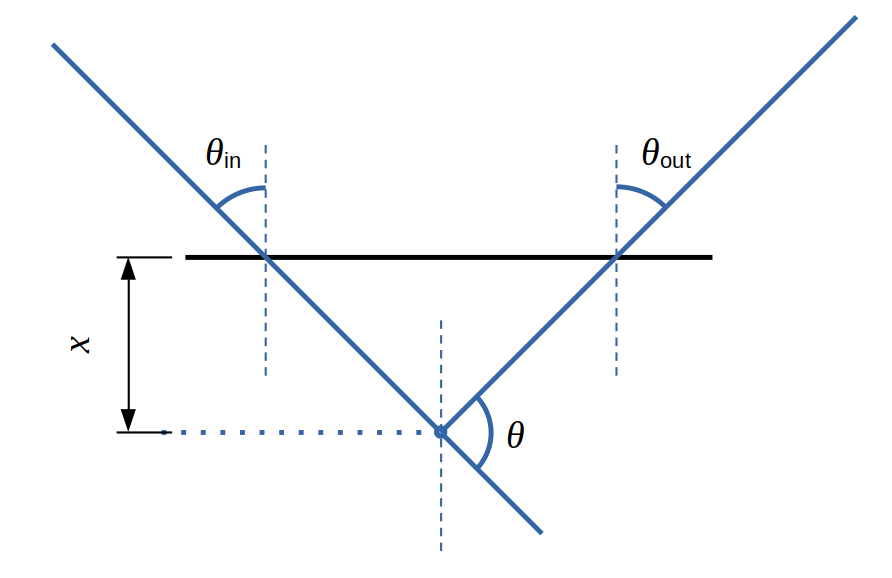

Neste caso, sabemos o caminho a ser percorrido. Para calcular a energia do íon devemos resolver a equação diferencial implícita:

$ \frac{dE}{dx}(E(x),x) = \epsilon(E)$

Complete o cálculo da energia final do íon como detectado e determine o alcance analítico do RBS para alfas em silício.

In [ ]:
theta_in  = 0
theta_out = 45

thickness = 11550.0 # 1e15 at./cm2   37376.33

fx = interp1d(En, -1*(Stp_e+Stp_n)*1e-3, kind='linear')
model = lambda x, y: fx(x)
xin = np.arange(0,thickness/np.cos(np.radians(theta_in)),100)
Ef_in = odeint(model,E0,xin)[-1][0]

# O que vem aqui?
theta_table,K_table = K(A1,A2)
Kd = interp1d(theta_table,K_table,kind='linear')
E_out = Ef_in * Kd( ... )
xout = 
Ef_out = 

print('K: %.3f'%(Kd(np.radians(180-theta_in-theta_out))))
print('Espalhamento na superfície: %.2f keV'%(Kd(np.radians(180-theta_in-theta_out))*E0))
print('Energia na profundidade: %.2f keV'%(Ef_in))
print('Energia após espalhamento: %.2f keV'%(E_out))
print('Energia ao emergir na superfície: %.2f keV  <--'%(Ef_out))
print('Porcentagem do alcance total: %.2f %%'%(100*thickness/range))

In [ ]:
x_range = np.arange(0,range,100)
Ex = odeint(model,E0,x_range)
fig, ax1 = plt.subplots()
ax1.plot(x_range,Ex,'g')
ax1.vlines(thickness,0.0,Ex.max(),linestyle='dashed')
ax2 = ax1.twinx()
ax2.plot(x_range[:-1],-np.diff(Ex[:,0]),'b')
ax1.set_ylabel('Energia do íon / keV', color='g')
ax2.set_ylabel('Energia perdida / keV.cm2/1e15at.', color='b')